In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [79]:
df = pd.read_csv(r"C:\Users\adity\Python_revision\df_price.csv")

In [9]:
df

,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18-08-2008,"Key Biscayne, Florida, United States",Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,...,10.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,4,3.76
1,16-09-2008,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,...,10.0,10.0,10.0,t,f,flexible,f,f,1,1.42
2,19-10-2008,"Coledale, New South Wales, Australia",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,9.0,10.0,9.0,t,t,strict_14_with_grace_period,f,f,1,1.25
3,7/11/2008,"Berlin, Berlin, Germany",Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,...,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,0.39
4,16-05-2009,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,10.0,10.0,9.0,t,f,moderate,f,f,1,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,2/8/2016,"Berlin, Berlin, Germany",Mitte,1.0,1.0,"['email', 'phone', 'facebook']",t,f,"Berlin, Berlin, Germany",Mitte,...,NaN,NaN,NaN,t,f,flexible,f,f,1,NaN
22548,17-04-2016,"Berlin, Berlin, Germany",Prenzlauer Berg,6.0,6.0,"['email', 'phone', 'facebook', 'jumio', 'gover...",t,f,"Berlin, Berlin, Germany",Schöneberg,...,NaN,NaN,NaN,t,t,flexible,f,f,6,NaN
22549,3/8/2012,"Berlin, Berlin, Germany",Prenzlauer Berg,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,NaN,NaN,NaN,t,f,flexible,f,f,2,NaN
22550,28-06-2015,"Berlin, Berlin, Germany",Mitte,3.0,3.0,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Mitte,...,NaN,NaN,NaN,t,f,flexible,f,f,3,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        22526 non-null  object 
 1   host_location                     22436 non-null  object 
 2   host_neighbourhood                17458 non-null  object 
 3   host_listings_count               22526 non-null  float64
 4   host_total_listings_count         22526 non-null  float64
 5   host_verifications                22526 non-null  object 
 6   host_has_profile_pic              22526 non-null  object 
 7   host_identity_verified            22526 non-null  object 
 8   street                            22552 non-null  object 
 9   neighbourhood                     21421 non-null  object 
 10  neighbourhood_cleansed            22552 non-null  object 
 11  neighbourhood_group_cleansed      22552 non-null  object 
 12  city

In [13]:
df[['price','extra_people','security_deposit','cleaning_fee']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             22552 non-null  float64
 1   extra_people      22552 non-null  float64
 2   security_deposit  13191 non-null  float64
 3   cleaning_fee      15406 non-null  float64
dtypes: float64(4)
memory usage: 704.9 KB


In [15]:
df[['price','extra_people','security_deposit','cleaning_fee']].isnull().sum()

price                  0
extra_people           0
security_deposit    9361
cleaning_fee        7146
dtype: int64

In [23]:
num = []
cat = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [39]:
df[num].isnull().sum()

host_listings_count                 26
host_total_listings_count           26
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           32
bedrooms                            18
beds                                40
price                                0
security_deposit                  9361
cleaning_fee                      7146
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
calendar_last_scraped                0
number_of_reviews                    0
first_review                      3914
last_review                       3908
review_scores_rating              4389
review_scores_accuracy            4414
review_scores_cleanliness

In [31]:
print(num)

['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']


TypeError: Value after * must be an iterable, not int

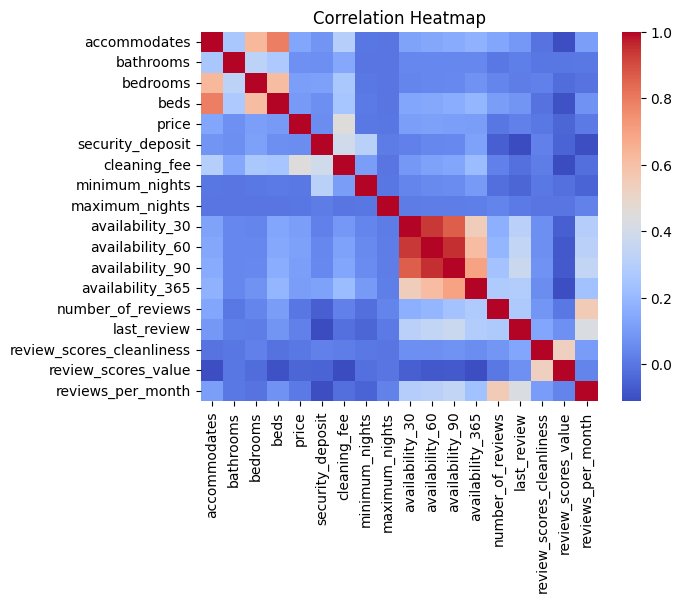

In [41]:
dfc = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee','minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'last_review','review_scores_cleanliness', 'review_scores_value', 'reviews_per_month']]
corr = dfc.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.figure(100,100)
plt.show()

In [43]:
dfc = df

In [45]:




# Convert categorical columns to numerical codes
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to original categories
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed = df_imputed.apply(lambda x: pd.Categorical.from_codes(x.astype(int), categories=df[x.name].dropna().unique()))

print(df_imputed)


       host_since                         host_location host_neighbourhood  \
0      18-08-2008  Key Biscayne, Florida, United States              Mitte   
1      16-09-2008               Berlin, Berlin, Germany    Prenzlauer Berg   
2      19-10-2008  Coledale, New South Wales, Australia    Prenzlauer Berg   
3       7/11/2008               Berlin, Berlin, Germany         Schöneberg   
4      16-05-2009               Berlin, Berlin, Germany    Prenzlauer Berg   
...           ...                                   ...                ...   
22547    2/8/2016               Berlin, Berlin, Germany              Mitte   
22548  17-04-2016               Berlin, Berlin, Germany    Prenzlauer Berg   
22549    3/8/2012               Berlin, Berlin, Germany    Prenzlauer Berg   
22550  28-06-2015               Berlin, Berlin, Germany              Mitte   
22551    9/3/2018               Berlin, Berlin, Germany           Neukölln   

      host_listings_count host_total_listings_count  \
0       

In [47]:
df_imputed.isnull().sum()

host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                   26
host_total_listings_count             26
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms        

In [49]:

# Convert categorical columns to numerical codes
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to original categories
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed = df_imputed.apply(lambda x: pd.Categorical.from_codes(x.astype(int), categories=df[x.name].dropna().unique()))

# Verify no null values
print(df_imputed.isnull().sum())


host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                   26
host_total_listings_count             26
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms        

In [53]:
if df_imputed.isnull().sum().equals(df.isnull().sum()):
    print("Its okay")
else:
    print("Ho gaya brooo")


Its okay


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        22526 non-null  object 
 1   host_location                     22436 non-null  object 
 2   host_neighbourhood                17458 non-null  object 
 3   host_listings_count               22526 non-null  float64
 4   host_total_listings_count         22526 non-null  float64
 5   host_verifications                22526 non-null  object 
 6   host_has_profile_pic              22526 non-null  object 
 7   host_identity_verified            22526 non-null  object 
 8   street                            22552 non-null  object 
 9   neighbourhood                     21421 non-null  object 
 10  neighbourhood_cleansed            22552 non-null  object 
 11  neighbourhood_group_cleansed      22552 non-null  object 
 12  city

In [81]:
# Fill NaN values in numerical columns with the median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [83]:
df.isnull().sum()

host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                    0
host_total_listings_count              0
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms        

In [61]:

# Convert categorical columns to numerical codes
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to original categories
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed = df_imputed.apply(lambda x: pd.Categorical.from_codes(x.astype(int), categories=df[x.name].dropna().unique()))

# Verify no null values
print(df_imputed.isnull().sum())


host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                    0
host_total_listings_count              0
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms        

In [77]:
dfc.isnull().sum()

host_since                          0
host_location                       0
host_neighbourhood                  0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                                0
state                               0
zipcode                             0
market                              0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type    

In [85]:


# Convert categorical columns to numerical codes
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to original categories
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
for column in df_imputed.columns:
    df_imputed[column] = pd.Categorical.from_codes(df_imputed[column].astype(int), categories=df[column].dropna().unique())

print(df_imputed)


       host_since                         host_location host_neighbourhood  \
0      18-08-2008  Key Biscayne, Florida, United States              Mitte   
1      16-09-2008               Berlin, Berlin, Germany    Prenzlauer Berg   
2      19-10-2008  Coledale, New South Wales, Australia    Prenzlauer Berg   
3       7/11/2008               Berlin, Berlin, Germany         Schöneberg   
4      16-05-2009               Berlin, Berlin, Germany    Prenzlauer Berg   
...           ...                                   ...                ...   
22547    2/8/2016               Berlin, Berlin, Germany              Mitte   
22548  17-04-2016               Berlin, Berlin, Germany    Prenzlauer Berg   
22549    3/8/2012               Berlin, Berlin, Germany    Prenzlauer Berg   
22550  28-06-2015               Berlin, Berlin, Germany              Mitte   
22551    9/3/2018               Berlin, Berlin, Germany           Neukölln   

      host_listings_count host_total_listings_count  \
0       

In [87]:
df_imputed.isnull().sum()

host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                    0
host_total_listings_count              0
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms        

In [69]:
df = dfc

In [89]:
df

,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18-08-2008,"Key Biscayne, Florida, United States",Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,...,10.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,4,3.76
1,16-09-2008,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,...,10.0,10.0,10.0,t,f,flexible,f,f,1,1.42
2,19-10-2008,"Coledale, New South Wales, Australia",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,9.0,10.0,9.0,t,t,strict_14_with_grace_period,f,f,1,1.25
3,7/11/2008,"Berlin, Berlin, Germany",Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,...,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,0.39
4,16-05-2009,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,10.0,10.0,9.0,t,f,moderate,f,f,1,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,2/8/2016,"Berlin, Berlin, Germany",Mitte,1.0,1.0,"['email', 'phone', 'facebook']",t,f,"Berlin, Berlin, Germany",Mitte,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.54
22548,17-04-2016,"Berlin, Berlin, Germany",Prenzlauer Berg,6.0,6.0,"['email', 'phone', 'facebook', 'jumio', 'gover...",t,f,"Berlin, Berlin, Germany",Schöneberg,...,10.0,10.0,10.0,t,t,flexible,f,f,6,0.54
22549,3/8/2012,"Berlin, Berlin, Germany",Prenzlauer Berg,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,...,10.0,10.0,10.0,t,f,flexible,f,f,2,0.54
22550,28-06-2015,"Berlin, Berlin, Germany",Mitte,3.0,3.0,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Mitte,...,10.0,10.0,10.0,t,f,flexible,f,f,3,0.54


In [91]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical codes
df_encoded = df.copy()
for column in categorical_columns:
    df_encoded[column] = pd.factorize(df[column])[0]

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Convert numerical codes back to original categories
for column in categorical_columns:
    df_imputed[column] = pd.Categorical.from_codes(df_imputed[column].astype(int), categories=df[column].dropna().unique())

# Verify no null values
print(df_imputed.isnull().sum())


host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                    0
host_total_listings_count              0
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms        

In [93]:

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical codes, handling NaN with a placeholder
df_encoded = df.copy()
for column in categorical_columns:
    df_encoded[column] = pd.factorize(df[column].fillna("Missing"))[0]

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Round categorical columns and convert back to original categories
for column in categorical_columns:
    # Get original categories (including "Missing")
    original_categories = pd.factorize(df[column].fillna("Missing"))[1]
    # Round imputed values to nearest integer and map back to categories
    df_imputed[column] = pd.Categorical.from_codes(
        df_imputed[column].round().astype(int),
        categories=original_categories,
    )

# Verify no null values
print(df_imputed.isnull().sum())
print(df_imputed)


host_since                          0
host_location                       0
host_neighbourhood                  0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                                0
state                               0
zipcode                             0
market                              0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type    

In [95]:
print(df.isnull().sum())

host_since                            26
host_location                        116
host_neighbourhood                  5094
host_listings_count                    0
host_total_listings_count              0
host_verifications                    26
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms        

## now checking performace of different k value

In [118]:
dfc = df.copy()

In [120]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        22526 non-null  object 
 1   host_location                     22436 non-null  object 
 2   host_neighbourhood                17458 non-null  object 
 3   host_listings_count               22552 non-null  float64
 4   host_total_listings_count         22552 non-null  float64
 5   host_verifications                22526 non-null  object 
 6   host_has_profile_pic              22526 non-null  object 
 7   host_identity_verified            22526 non-null  object 
 8   street                            22552 non-null  object 
 9   neighbourhood                     21421 non-null  object 
 10  neighbourhood_cleansed            22552 non-null  object 
 11  neighbourhood_group_cleansed      22552 non-null  object 
 12  city

In [112]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [122]:

# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Replace NaN with "Missing" for temporary handling
df_encoded = df.copy()
for column in categorical_columns:
    df_encoded[column] = df[column].fillna("Missing")
    df_encoded[column] = pd.factorize(df_encoded[column])[0]

# Separate rows with no missing values
complete_rows = df_encoded[(df != "Missing").all(axis=1)]
incomplete_rows = df_encoded[(df == "Missing").any(axis=1)]

# Split the complete rows into train and test
train_data, test_data = train_test_split(complete_rows, test_size=0.3, random_state=42)

# Introduce artificial missing values in the test set
test_data_with_missing = test_data.copy()
np.random.seed(42)  # For reproducibility
for column in categorical_columns:
    mask = np.random.rand(len(test_data)) < 0.3  # 30% of values become NaN
    test_data_with_missing.loc[mask, column] = -1  # Placeholder for NaN

In [ ]:


# Evaluate different k values
results = {}
for k in [3, 5, 7]:
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=k, missing_values=-1)
    
    # Fit on training data and transform the test data
    imputer.fit(train_data)
    imputed_data = imputer.transform(test_data_with_missing)
    
    # Convert to DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=test_data.columns)
    
    # Map back numerical codes to categories for predictions
    for column in categorical_columns:
        original_categories = pd.factorize(df[column].fillna("Missing"))[1]
        imputed_df[column] = pd.Categorical.from_codes(
            imputed_df[column].round().astype(int), categories=original_categories
        )
    
    # Evaluate accuracy
    accuracy = []
    for column in categorical_columns:
        # Convert true values and predictions to the same type (string in this case)
        y_true = test_data[column].astype(str).values  # Convert true labels to strings
        y_pred = imputed_df[column].astype(str).values  # Convert predicted labels to strings
        
        # Calculate accuracy for the column
        acc = accuracy_score(y_true, y_pred)
        accuracy.append(acc)
    
    results[k] = {
        "Accuracy (Categorical)": np.mean(accuracy)
    }

# Output results
print("Performance for different k values:")
for k, metrics in results.items():
    print(f"k={k}: {metrics}")
